# Nairobi AirBnb Listing Data Analysis 🏠
**Data Period:** October 1, 2024 – September 29, 2025
 
This project analyzes a sample Nairobi’s Airbnb and vacation rental market property listings and calendar rates data to uncover trends and patterns in the city’s short-term rental landscape.

#### Listings Data 📃
>  The [**Listings Data**](https://github.com/Morris-mk/Nairobi_AirbnbMarket_Overview_and-_InvestmentAnalysis/raw/refs/heads/main/data/listings_raw_data.csv) includes detailed information on the 300 listings, covering property attributes, ratings across multiple categories, and performance metrics for the trailing twelve months.

##### *Objectives:*
1. Examine the distribution, trends, and patterns of Airbnb listings in Nairobi.
2. Evaluate the investment potential of the market, focusing on returns and revenue.

#### Past Calendar Rates Data 🗓️
> The [**Past Calendar Rates Data**](https://github.com/Morris-mk/Nairobi_AirbnbMarket_Overview_and-_InvestmentAnalysis/raw/refs/heads/main/data/past_calendar_rates_raw_data.csv) contains information on occupancy rates, revenue metrics, average daily rates, booking lead times, and minimum night requirements.

##### *Objectives:*
1. Identify demand patterns, pricing trends, and occupancy rates across different periods of the year. 

**Data Source:** [AirROI.com](https://www.airroi.com/data-portal/markets/nairobi-kenya)

In [1]:
# import libraries and load data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.impute import SimpleImputer # to impute missing values

# for geographical plotting
import folium

import warnings
warnings.filterwarnings('ignore')

**Load the Datasets**

In [ ]:
# load listings data with information about properties listed
df_listings = pd.read_csv(r'https://github.com/Morris-mk/Nairobi_AirbnbMarket_Overview_and-_InvestmentAnalysis/raw/refs/heads/main/data/listings_raw_data.csv')

# load calendar data with information on occupancy of the Airbnbs
df_calendar =pd.read_csv(r'https://github.com/Morris-mk/Nairobi_AirbnbMarket_Overview_and-_InvestmentAnalysis/raw/refs/heads/main/data/past_calendar_rates_raw_data.csv')

In [3]:
print(df_listings.shape)
df_listings.head()

(300, 62)


,listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,...,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,75683,Kiloranhouse Apt Prime Bedroom,Private room in home,private_room,https://a0.muscache.com/im/pictures/5499026/ef...,13,26997,Adriel,NaN,NaN,...,0.011,0.000,0.5,58.9,0.0,0.0,1,0,89,90
1,471581,Located In a Serene Environment,Entire cottage,entire_home,https://a0.muscache.com/im/pictures/6434524/bc...,37,2280941,Bella,NaN,NaN,...,0.422,0.613,17.6,2278.3,25.6,3307.3,38,28,52,90
2,906958,Makena's Place Karen - Flamingo Room,Private room in cottage,private_room,https://a0.muscache.com/im/pictures/68ecc57f-d...,29,4856316,Chichi,NaN,NaN,...,0.233,0.000,12.2,1576.3,0.0,0.0,21,0,69,90
3,1023556,Guesthouse Near Nairobi National Park & Airport,Entire guesthouse,entire_home,https://a0.muscache.com/im/pictures/ddd8badc-1...,20,5634522,Janet,NaN,NaN,...,0.033,0.000,0.6,83.3,0.0,0.0,3,0,87,90
4,1237886,Hob House,Room in bed and breakfast,hotel_room,https://a0.muscache.com/im/pictures/cbdab7e1-f...,8,6748840,NaN,NaN,NaN,...,0.056,0.000,7.0,910.2,0.0,0.0,5,0,85,90


In [4]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   300 non-null    int64  
 1   listing_name                 300 non-null    object 
 2   listing_type                 300 non-null    object 
 3   room_type                    300 non-null    object 
 4   cover_photo_url              300 non-null    object 
 5   photos_count                 300 non-null    int64  
 6   host_id                      300 non-null    int64  
 7   host_name                    298 non-null    object 
 8   cohost_ids                   100 non-null    object 
 9   cohost_names                 100 non-null    object 
 10  superhost                    300 non-null    bool   
 11  latitude                     300 non-null    float64
 12  longitude                    300 non-null    float64
 13  guests              

In [5]:
print(df_calendar.shape)
df_calendar.head()

(3552, 14)


,listing_id,date,vacant_days,reserved_days,occupancy,revenue,rate_avg,booked_rate_avg,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,native_booked_rate_avg,native_rate_avg,native_revenue
0,36253079,2024-10-01,31,0,0.000,0.0,32.1,NaN,NaN,NaN,NaN,NaN,4141.0,0.0
1,36253079,2024-11-01,30,0,0.000,0.0,30.8,NaN,NaN,NaN,NaN,NaN,3973.0,0.0
2,36253079,2024-12-01,18,13,0.419,408.0,31.3,31.4,1.0,28.0,NaN,4066.0,4054.0,52839.0
3,36253079,2025-01-01,16,15,0.484,472.0,31.5,31.5,NaN,NaN,1.0,4069.0,4069.0,60968.0
4,36253079,2025-02-01,28,0,0.000,0.0,30.2,NaN,NaN,NaN,1.0,NaN,3901.0,0.0


In [6]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              3552 non-null   int64  
 1   date                    3552 non-null   object 
 2   vacant_days             3552 non-null   int64  
 3   reserved_days           3552 non-null   int64  
 4   occupancy               3552 non-null   float64
 5   revenue                 3552 non-null   float64
 6   rate_avg                3552 non-null   float64
 7   booked_rate_avg         1868 non-null   float64
 8   booking_lead_time_avg   1662 non-null   float64
 9   length_of_stay_avg      1662 non-null   float64
 10  min_nights_avg          2691 non-null   float64
 11  native_booked_rate_avg  1868 non-null   float64
 12  native_rate_avg         3552 non-null   float64
 13  native_revenue          3552 non-null   float64
dtypes: float64(10), int64(3), object(1)
memo

***

## Listings Data Analysis

**Data Cleaning & Wrangling for df_listings**
- remove duplicates
- harmonize data type inconsistencies
- remove unnecesary features
- deal with null values
- outliers

In [7]:
# create a copy of the data
df_listings_copy = df_listings.copy()

# remove duplicates
df_listings.drop_duplicates()
print('duplicates removed')

# missing values in percentage
((df_listings.isna().sum()/ len(df_listings))*100).round(2)

duplicates removed


listing_id                     0.0
listing_name                   0.0
listing_type                   0.0
room_type                      0.0
cover_photo_url                0.0
                              ... 
l90d_adjusted_revpar_native    0.0
l90d_reserved_days             0.0
l90d_blocked_days              0.0
l90d_available_days            0.0
l90d_total_days                0.0
Length: 62, dtype: float64

In [8]:
# remove columns that have missing values exceeding 50% threhold
thresh = int( 0.5 * len(df_listings))
df_listings.dropna(thresh=thresh, axis=1, inplace=True)

print(f'original dataframe shape = {df_listings_copy.shape},\nnew dataframe shape = {df_listings.shape}')
print('------------------------------')
print('=> features with extreme null_values removed')

original dataframe shape = (300, 62),
new dataframe shape = (300, 60)
------------------------------
=> features with extreme null_values removed


In [9]:
# feature selection and manipulation in df_listings
    # calculate average exchange_rate to use during currency conversion
rate = (df_listings.ttm_avg_rate_native / df_listings.ttm_avg_rate).mean()

    # convert cleaning_fee and extra_guest_fee from USD to KSH using the average exchange rate
df_listings.loc[:, 'cleaning_fee'] = round(df_listings['cleaning_fee'] * rate, 2)
df_listings.loc[:, 'extra_guest_fee'] = round(df_listings['extra_guest_fee'] * rate, 2)

    # drop some irrelevant columns, columns in USD currency and the extra ratings features
df_listings.drop(columns = ['cover_photo_url' ,'registration','rating_accuracy', 'rating_checkin','rating_cleanliness','rating_communication',
                            'rating_location','rating_value','ttm_revenue', 'ttm_avg_rate','ttm_revpar', 'ttm_adjusted_revpar', 'l90d_revenue', 
                           'l90d_avg_rate', 'ttm_total_days', 'l90d_total_days','l90d_revpar', 'l90d_adjusted_revpar','currency' ], inplace=True)

    # Check remaining missing values
df_listings.shape

(300, 41)

In [10]:
# rename some cols for easier referrencing 
df_listings.rename(columns= {'num_reviews':'total_reviews','ttm_revenue_native':'total_ttm_revenue', 'ttm_avg_rate_native': 'daily_avg_ttm_rate',
                             'ttm_revpar_native':'ttm_revpar', 'ttm_adjusted_revpar_native':'ttm_adjusted_revpar', 'l90d_revenue_native':'l90d_revenue',
                             'l90d_avg_rate_native':'l90d_avg_rate','l90d_revpar_native':'l90d_revpar', 'l90d_adjusted_revpar_native':'l90d_adjusted_revpar',
                             }, inplace=True)

In [11]:
# missing values in percentage
((df_listings.isna().sum()/ len(df_listings))*100).round(2)

listing_id                  0.00
listing_name                0.00
listing_type                0.00
room_type                   0.00
photos_count                0.00
host_id                     0.00
host_name                   0.67
superhost                   0.00
latitude                    0.00
longitude                   0.00
guests                     14.33
bedrooms                   17.33
beds                        0.67
baths                       0.00
amenities                   0.00
instant_book                6.67
professional_management    42.00
min_nights                  0.67
cancellation_policy         0.00
cleaning_fee                0.33
extra_guest_fee             6.33
total_reviews               0.00
rating_overall              3.67
total_ttm_revenue           0.00
daily_avg_ttm_rate          0.00
ttm_occupancy               0.00
ttm_adjusted_occupancy      0.00
ttm_revpar                  0.00
ttm_adjusted_revpar         0.00
ttm_reserved_days           0.00
ttm_blocke

- For the columns with continous data(rating_overall,extra_guest_fee ) we'll use the mean to impute for missing values
- for columns with discrete data we'll use the majority class 
- for the host_name column we'll replace null values with a place holder

In [ ]:
# select features with missing values 
discrete_cols = ['guests', 'bedrooms', 'beds', 'baths', 'instant_book', 'professional_management', 'min_nights']
continous_cols = ['cleaning_fee', 'extra_guest_fee', 'rating_overall']

# import imputer class and fill in missing values 
imputer_d = SimpleImputer(strategy="most_frequent", copy=False) # discrete features
imputer_c = SimpleImputer(strategy="mean", copy=False) #for continous features

df_listings[discrete_cols] = imputer_d.fit_transform(df_listings[discrete_cols])
df_listings[continous_cols] = imputer_c.fit_transform(df_listings[continous_cols])

# fill in missing value in 'host_name' feature with 'missing' as the place_holder
df_listings.host_name.fillna('missing', inplace=True)

In [13]:
# confirm there are no missing values 
df_listings.isna().sum()

listing_id                 0
listing_name               0
listing_type               0
room_type                  0
photos_count               0
host_id                    0
host_name                  0
superhost                  0
latitude                   0
longitude                  0
guests                     0
bedrooms                   0
beds                       0
baths                      0
amenities                  0
instant_book               0
professional_management    0
min_nights                 0
cancellation_policy        0
cleaning_fee               0
extra_guest_fee            0
total_reviews              0
rating_overall             0
total_ttm_revenue          0
daily_avg_ttm_rate         0
ttm_occupancy              0
ttm_adjusted_occupancy     0
ttm_revpar                 0
ttm_adjusted_revpar        0
ttm_reserved_days          0
ttm_blocked_days           0
ttm_available_days         0
l90d_revenue               0
l90d_avg_rate              0
l90d_occupancy

**Investigating Outliers**

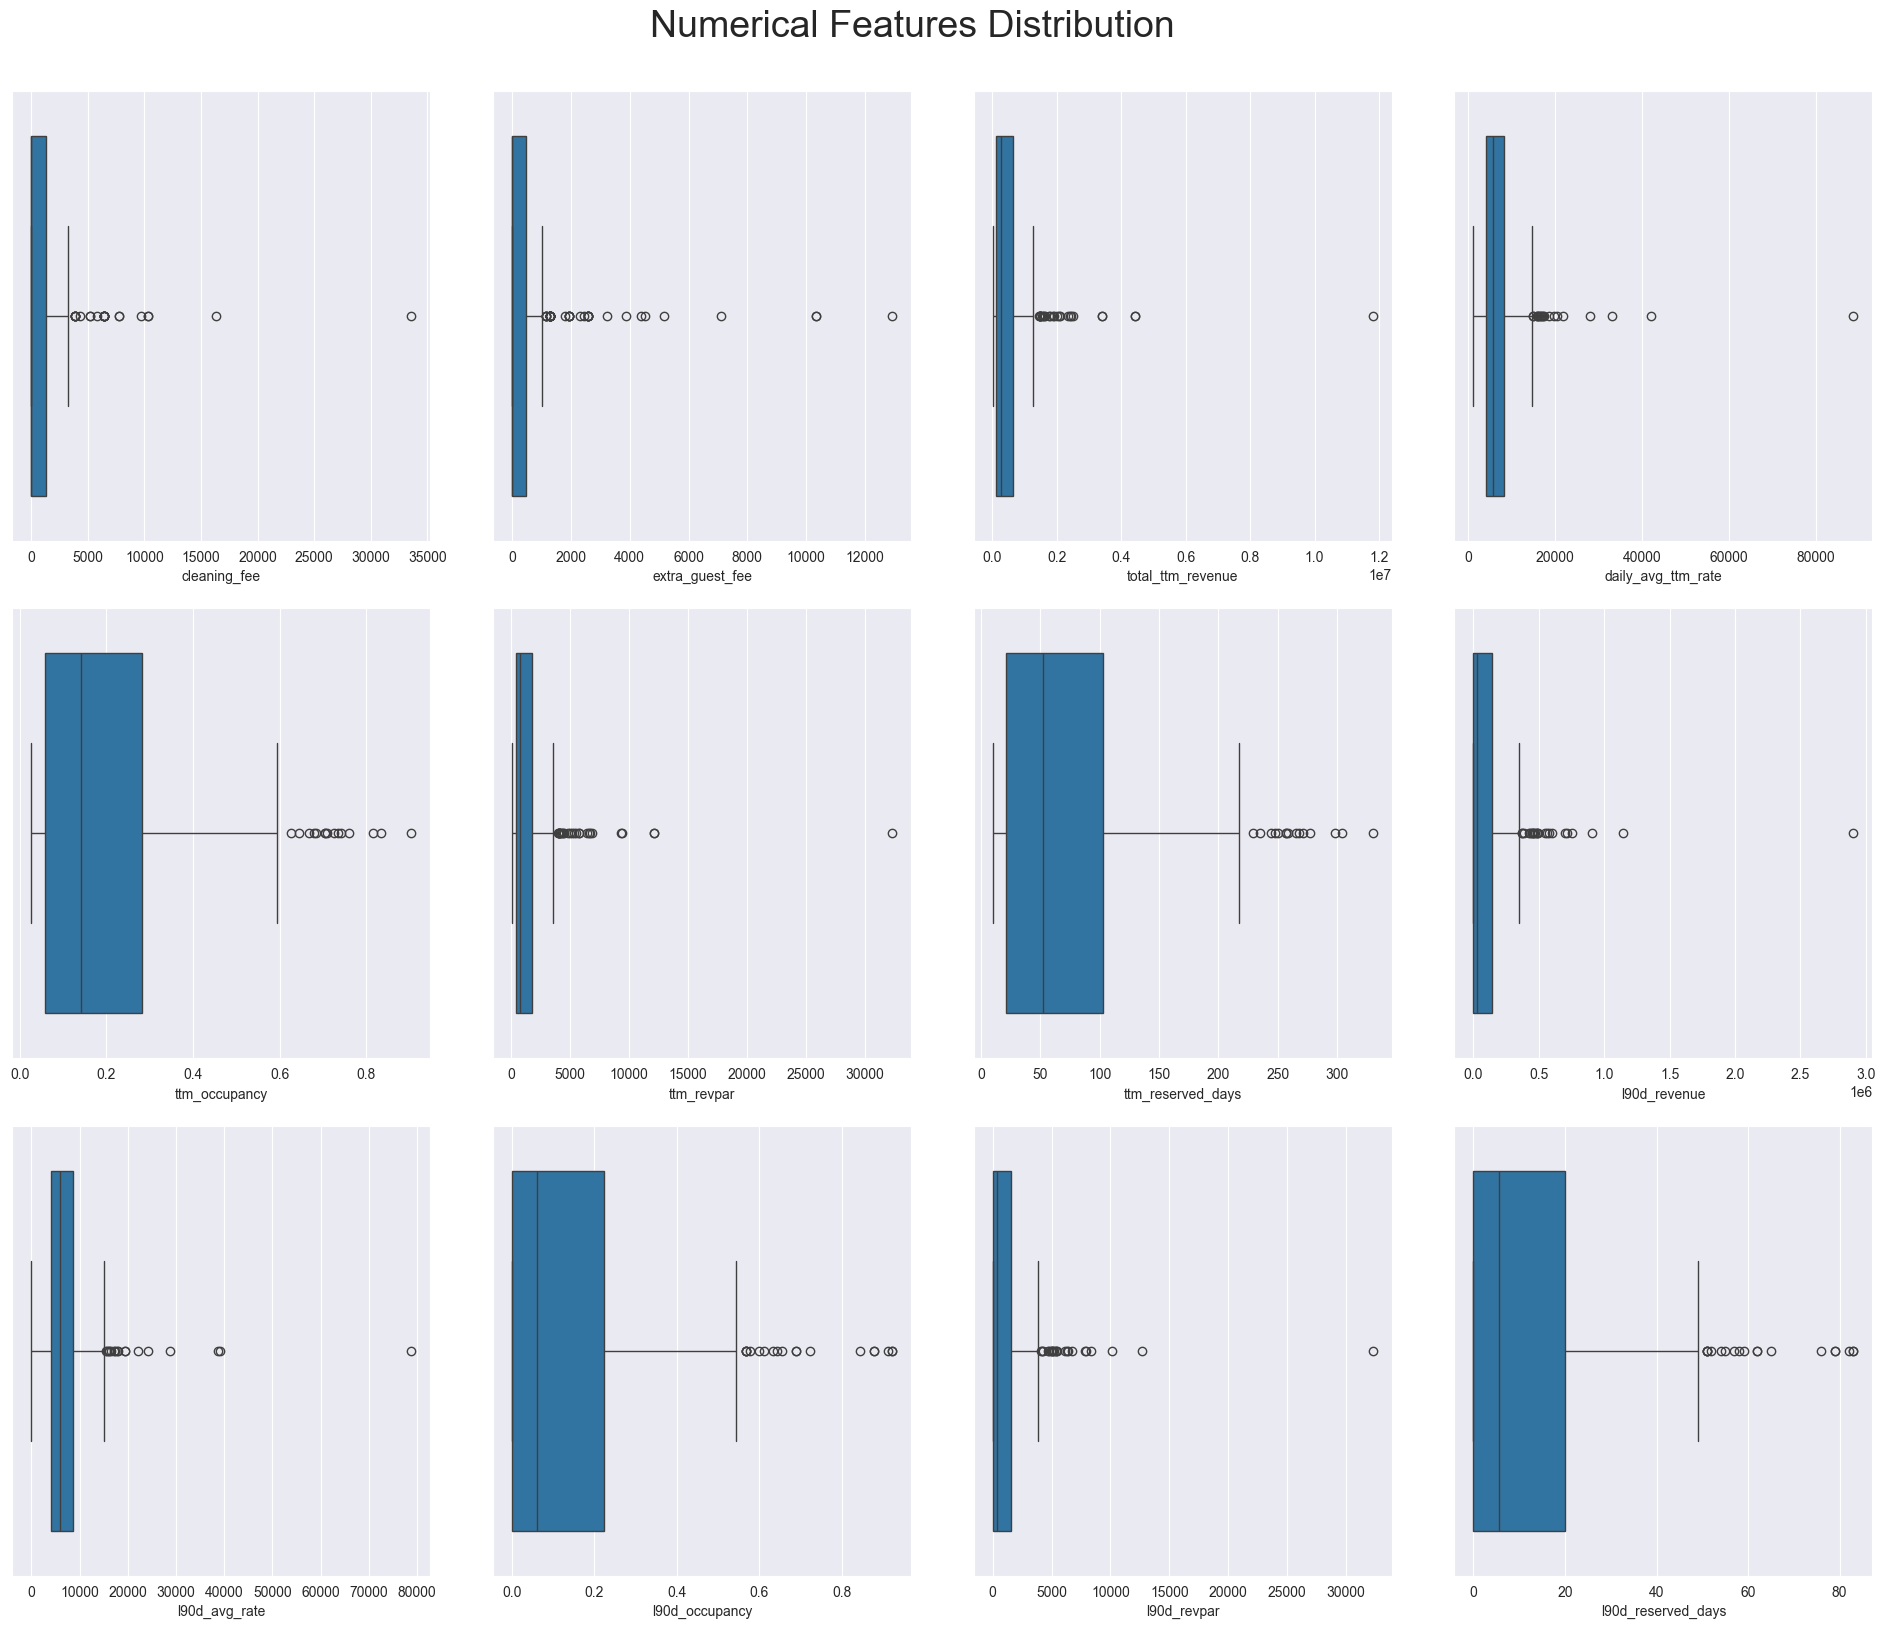

In [14]:
#  Distributions for most important numerical columns 
cols_no = ['listing_id','host_id', 'latitude', 'longitude', 'photos_count','ttm_adjusted_revpar', 'l90d_adjusted_occupancy','l90d_adjusted_revpar',
           'total_reviews', 'rating_overall', 'ttm_adjusted_occupancy','ttm_blocked_days','ttm_available_days','l90d_blocked_days','l90d_available_days']
dist_cols = [col for col in df_listings.select_dtypes('number').columns if col not in cols_no]

# plot the boxplot distributions
def create_boxplots(df, cols):
    #define the figure canvas
    fig, axs = plt.subplots(3, 4, figsize=(24, 18))
    axs = axs.flatten()
    plt.subplots_adjust(hspace=0.15, wspace=0.15, top=0.935)

    # loop through the cols and plot the boxplots
    for i, col in enumerate(cols):
        if 1 < len(cols):
            sns.boxplot(df, x=col, ax=axs[i])
        else:
            break
    plt.suptitle('Numerical Features Distribution', fontsize=27)
    plt.show()

create_boxplots(df_listings, dist_cols)

> There features have significant number of outliers, but they are actual data values so removing them takes away important information
- the trailing twelve month revenue (total_ttm_revenue)is an important feature.It has one extreme outlier that is likely to skew our analysis; remove it

In [15]:
max = df_listings.total_ttm_revenue.max()
df_listings = df_listings[df_listings.total_ttm_revenue < max]
print(df_listings.shape)

(299, 41)


### EDA for df_listings

**Objective 1:** Understanding the distribution, trends and patterns of listings within Nairobi

> Lead Questions
- [ ] How are Airbnb listings distributed geographically across Nairobi?
- [ ] What types of listings (room_type, listing_type) are most common in Nairobi, and how do their characteristics vary?
- [ ] What amenities are most commonly offered, and do they correlate with higher ratings or occupancy?
- [ ] How do host characteristics (superhost status, professional management) influence listing performance?

**Objective 2:** Analyze the Investment Potential of the Market in Terms of Occupancy_rates, Revenue and Returns
- [ ] What is the revenue generation of Airbnb listings in Nairobi, and how does it vary by property type or location?
- [ ] What are the key drivers of higher revenue per available room (RevPAR) in Nairobi’s Airbnb market?
- [ ] How do pricing strategies (daily rates, cleaning fees, extra guest fees) impact occupancy and revenue?
- [ ] What is the return on investment (ROI) potential for new Airbnb listings in Nairobi?


**Summary statistics**
> To understand the data characteristics 

In [16]:
# identify the number unique samples in each feature
df_listings.nunique()

# define columns to exclude
no = ['listing_id', 'host_id','latitude', 'longitude']

# summary stats for numerical features
num_cols = [col for col in df_listings.select_dtypes(exclude= ['object','bool']) if col not in no ]
df_listings[num_cols].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
photos_count,299.0,30.34,16.00,0.00,19.00,29.00,37.00,122.00
cleaning_fee,299.0,1147.81,2712.16,0.00,0.00,0.00,1292.13,33595.34
extra_guest_fee,299.0,462.29,1389.78,0.00,0.00,0.00,460.75,12921.29
total_reviews,299.0,59.05,74.29,1.00,18.00,39.00,77.00,692.00
rating_overall,299.0,4.78,0.17,4.17,4.70,4.80,4.90,5.00
total_ttm_revenue,299.0,498873.70,628919.44,17745.00,125054.00,274366.00,629872.00,4416403.00
daily_avg_ttm_rate,299.0,6859.45,4707.69,1292.80,4100.95,5890.40,8277.75,42204.10
ttm_occupancy,299.0,0.20,0.18,0.03,0.06,0.14,0.28,0.90
ttm_adjusted_occupancy,299.0,0.17,0.20,0.00,0.00,0.09,0.29,0.87
ttm_revpar,299.0,1366.78,1723.07,48.60,342.65,751.70,1725.70,12099.70


In [17]:
# summary stats for categorical columns
extra = ['guests', 'bedrooms', 'beds', 'baths', 'instant_book', 'professional_management', 'min_nights']
cat_cols = [col for col in df_listings.select_dtypes(['object','bool']) if col not in no]
cols = extra + cat_cols

df_listings[cols].describe().T

,count,unique,top,freq
guests,299.0,11.0,2.0,165.0
bedrooms,299.0,9.0,1.0,162.0
beds,299.0,12.0,1.0,143.0
baths,299.0,12.0,1.0,117.0
instant_book,299,2,True,164
professional_management,299,1,False,299
min_nights,299.0,9.0,1.0,151.0
listing_name,299,297,Bonsai Villa - Standard King Room,2
listing_type,299,29,Entire rental unit,129
room_type,299,3,entire_home,250


**insights from the summary statistics**
- most of the listed room type is entire home

- Most listings allow for 2 guests, a minimum reservation of 1 night and have instant booking 

- Most listings are 1 Bedroom and have 1 bed and 1 bath

- the **average occupancy rate** for a listing within Nairobi is *20%*, this means that out of 365 days in a year, a listing is reserved for 73 days.

- The revenue per room in a year is about 1366.78 Ksh (About 10.5 USD)

- *50%* of the listings **don't charge** for an *extra guest*. 
    - 25% of those that charge extra for a guest, the amount charged is 460.75Ksh and below

- The average daily cost  for booking in Nairobi ranges is 6859.45 Ksh 
    - Because of the outliers, the mean rate is skewed, hence we'll use the median to compare the average daily cost which is 5890.4 Ksh(about 45.5 USD)
    - The rates range from *1,292.8 Ksh as the lowest* to *42,204.1 Ksh* as the *highest rate*.  
    - 75% of the listings cost 8,277.75Ksh and below

- The median average yearly revenue is **274,366.0 Ksh**
    - The **average yearly revenue** for a listing is **498,873.7 Ksh**. 
    - The listing that generated the *minimum* amount of revenue had **17,745.0 ksh** and the *maximum* amount generated was **4,416,403.0 Ksh**.  

**How are Airbnb listings distributed geographically across Nairobi?**

In [ ]:
folium??

In [18]:
# define the map object for Nairobi
latitude = -1.286389
longitude = 36.817222
nairobi_map = folium.Map(location=[latitude, longitude], tiles='CartoDB Dark Matter')

In [19]:
# add the markers to identify the location of the listings and add pop up labels to show the ttm_revenue
listings = folium.map.FeatureGroup()

for lat, lng in zip(df_listings.latitude, df_listings.longitude):
    listings.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
# add pop ups 
latitudes = list(df_listings.latitude)
longitudes = list(df_listings.longitude)
labels = list(df_listings.total_ttm_revenue)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], tooltip=label).add_to(nairobi_map)

# add listings to map
nairobi_map.add_child(listings)

**What types of listings (e.g., room_type, listing_type) are most common in Nairobi, and how do their characteristics vary?**

In [20]:
# distribution of listing_type across the listings
df_listings.listing_type.value_counts(normalize=True, ascending=False).round(3).to_frame()*100

,proportion
listing_type,
Entire rental unit,43.1
Entire serviced apartment,9.4
Entire condo,9.0
Private room in rental unit,6.4
Entire guesthouse,6.4
Entire home,6.0
Private room in bed and breakfast,2.7
Entire guest suite,2.0
Entire cottage,1.7


              proportion
room_type               
entire_home    83.612040
private_room   16.053512
hotel_room      0.334448


Text(0.5, 1.0, 'Room type Proportions')

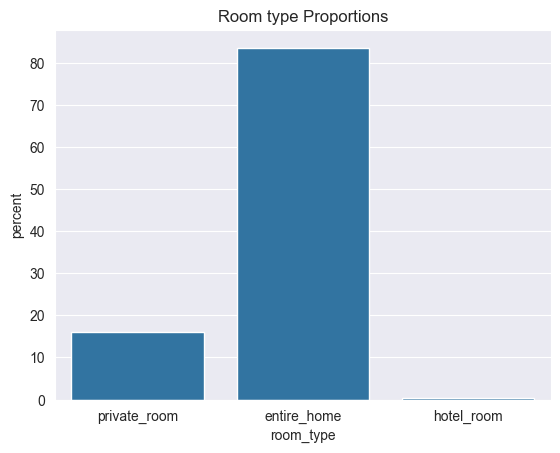

In [21]:
# determine the proportions of room type
print(df_listings.room_type.value_counts(normalize=True).to_frame()*100)

# countplot showing the proportion of room type
sns.countplot(data=df_listings, x='room_type', stat='percent')
plt.title('Room type Proportions')

**Proportion of Bedrooms per room type**

bedrooms           1.0        2.0        3.0       4.0   5.0         7.0   \
room_type                                                                   
entire_home   50.800000  27.600000  17.200000  3.600000   0.4    0.000000   
hotel_room     0.000000   0.000000   0.000000  0.000000   0.0  100.000000   
private_room  72.916667   8.333333   2.083333  2.083333   0.0   10.416667   

bedrooms          8.0   10.0      15.0  
room_type                               
entire_home   0.000000   0.4  0.000000  
hotel_room    0.000000   0.0  0.000000  
private_room  2.083333   0.0  2.083333  
--------+++++++++++


Text(0.5, 1.0, 'Proportion of Bedrooms per Room_type')

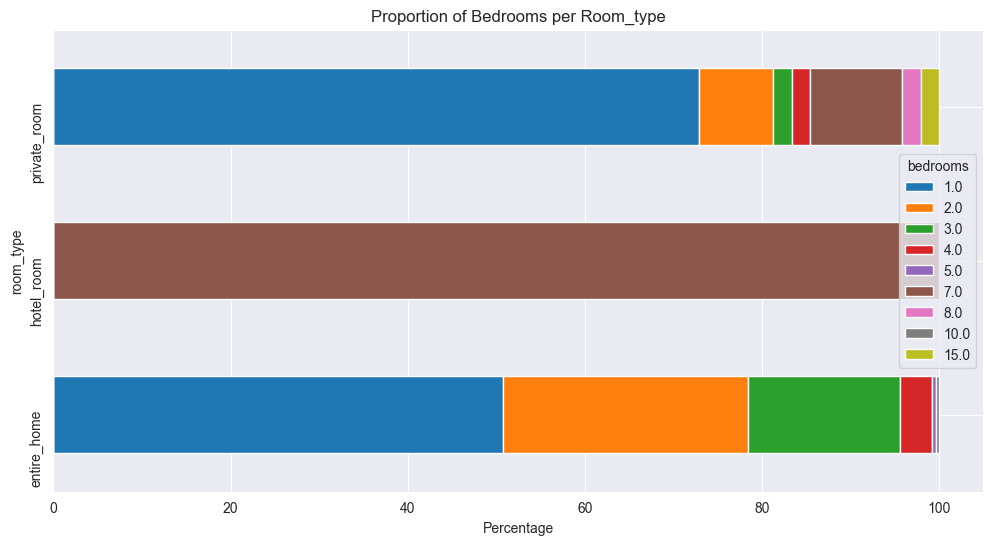

In [ ]:
# cross tabulate room_type against the number of bedrooms
room_bedrooms = pd.crosstab(df_listings.room_type, df_listings.bedrooms, normalize='index')*100
print(room_bedrooms)
print('--------+++++++++++')

# plot a stacked bar chart 
crosstab_data = pd.crosstab(df_listings.room_type, df_listings.bedrooms, normalize='index')*100
crosstab_data.plot(kind='barh',
                   stacked=True,
                    figsize=(12, 6))
plt.xlabel('Percentage')
plt.yticks(rotation=90)
plt.title('Proportion of Bedrooms per Room_type')

> Across the room_types, 1 bedroom is the most commmon bedroom category

**Categorical columns**

In [ ]:
# Select categorical features
cat_cols = ['cancellation_policy', 'instant_book', 'guests','bedrooms', 'beds', 'baths', 'min_nights','professional_management']

def categorical_variable_distribution(cat_cols):  
    # Define the figure canvas
    fig, axs = plt.subplots(2, 4, figsize=(24, 15))
    plt.subplots_adjust(hspace=0.15, wspace=0.15, top=0.94)
    axs = axs.flatten()

    # Loop through categorical columns and plot
    for index, col in enumerate(cat_cols):
        sns.countplot(data=df_listings, x=col, ax=axs[index], stat='proportion')

        # labels
        axs[index].set_xlabel(None)
        axs[index].set_title(f' {col} column', fontsize=14)
        axs[index].set_ylabel("Proportion")
        axs[index].tick_params(axis='x', rotation=30)

        # Annotate each bar in the current axis
        for p in axs[index].patches:
            prop = p.get_height()
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            label = f'{prop:.1%}'  
            axs[index].annotate(label, (x, y), ha='center', va='bottom', fontsize=10)
    # name the visualization
    plt.suptitle('Proportions of Categories in each Categorical column', fontsize=25)
    plt.show()

# plot the 
categorical_variable_distribution(cat_cols)

**How do host characteristics (superhost status, cancelation policies) influence listing performance?**
- measured on ratings and occupancy rates 


In [59]:
# determine how superhost status affects listing's occupancy and rating
print(df_listings.groupby('superhost')['rating_overall'].mean().to_frame())
print('-----------+++++++++++++')
print(df_listings.groupby('superhost')['ttm_occupancy'].mean().to_frame())


           rating_overall
superhost                
False            4.738364
True             4.849815
-----------+++++++++++++
           ttm_occupancy
superhost               
False           0.152602
True            0.291935


In [62]:
# determine how cancellation policy affects occupancy rates 
print(df_listings.groupby('cancellation_policy')['ttm_occupancy'].mean().to_frame().sort_values(by='ttm_occupancy',ascending=False))

                     ttm_occupancy
cancellation_policy               
Limited                   0.553000
Strict                    0.221382
Firm                      0.214000
Moderate                  0.204243
Flexible                  0.192364


In [61]:
# impact of instant_book  on occupancy_rates 
print(df_listings.groupby('instant_book')['ttm_occupancy'].mean().to_frame())

              ttm_occupancy
instant_book               
False              0.202652
True               0.203159


> Listings with Superhost status have on average, higher occupancy rate and rating

> Listing that have Instant_book status have slightly higher occupancy rates compared to those that don't

> **Limited cancelation policy** has the highest average occupancy rate compared to the other policies, this might be *because* limited cancelation policy *offers better refund conditions*

### Correlation Analysis

In [65]:
non_cols = ['listing_id', 'host_id', 'latitude', 'longitude', 'superhost']
cor_cols = [c for c in df_listings.select_dtypes(exclude='object') if c not in non_cols]
correlation = df_listings[cor_cols].corr(method='spearman').round(2) 
correlation

,photos_count,cleaning_fee,extra_guest_fee,total_reviews,rating_overall,total_ttm_revenue,daily_avg_ttm_rate,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,...,ttm_available_days,l90d_revenue,l90d_avg_rate,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_adjusted_revpar,l90d_reserved_days,l90d_blocked_days,l90d_available_days
photos_count,1.00,0.04,-0.16,0.08,0.09,0.21,0.28,0.09,0.04,0.21,...,-0.09,0.17,0.31,0.15,0.11,0.17,0.12,0.15,0.10,-0.15
cleaning_fee,0.04,1.00,0.15,0.03,0.11,0.09,0.10,0.05,-0.02,0.09,...,-0.05,-0.04,0.08,-0.05,-0.03,-0.04,-0.03,-0.05,-0.02,0.05
extra_guest_fee,-0.16,0.15,1.00,-0.06,0.05,-0.14,-0.08,-0.11,-0.11,-0.14,...,0.11,-0.17,-0.09,-0.18,-0.08,-0.17,-0.09,-0.18,-0.14,0.18
total_reviews,0.08,0.03,-0.06,1.00,0.08,0.36,-0.08,0.48,0.16,0.36,...,-0.48,0.33,-0.07,0.35,0.10,0.33,0.10,0.35,0.03,-0.35
rating_overall,0.09,0.11,0.05,0.08,1.00,0.18,0.05,0.18,0.10,0.18,...,-0.18,0.12,0.07,0.11,0.04,0.12,0.04,0.11,0.08,-0.11
total_ttm_revenue,0.21,0.09,-0.14,0.36,0.18,1.00,0.50,0.85,0.46,1.00,...,-0.85,0.66,0.53,0.59,0.30,0.66,0.31,0.59,0.19,-0.59
daily_avg_ttm_rate,0.28,0.10,-0.08,-0.08,0.05,0.50,1.00,0.01,-0.06,0.50,...,-0.01,0.31,0.96,0.12,0.03,0.31,0.07,0.12,0.03,-0.12
ttm_occupancy,0.09,0.05,-0.11,0.48,0.18,0.85,0.01,1.00,0.54,0.85,...,-1.00,0.58,0.07,0.62,0.30,0.58,0.29,0.62,0.19,-0.62
ttm_adjusted_occupancy,0.04,-0.02,-0.11,0.16,0.10,0.46,-0.06,0.54,1.00,0.46,...,-0.54,0.19,-0.01,0.23,0.52,0.19,0.51,0.23,0.56,-0.23
ttm_revpar,0.21,0.09,-0.14,0.36,0.18,1.00,0.50,0.85,0.46,1.00,...,-0.85,0.66,0.53,0.59,0.30,0.66,0.31,0.59,0.19,-0.59


**Analysis Guide Questions**
- what features have a high correlation to revenue and occupancy rates 
- how does the distribution of revenue and occupancy rates vary depending on the room type
- How do pricing strategies (daily rates, cleaning fees, extra guest fees) impact occupancy and revenue?

<Axes: >

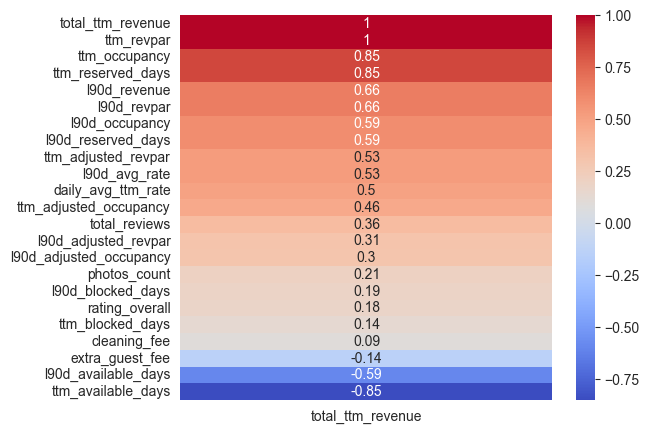

In [66]:
# Correlation heatmap for revenue
plt.figure(figsize=(6,5))
sns.heatmap(correlation.total_ttm_revenue.sort_values(ascending=False).to_frame(), annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'Revenue distribution per Room_type')

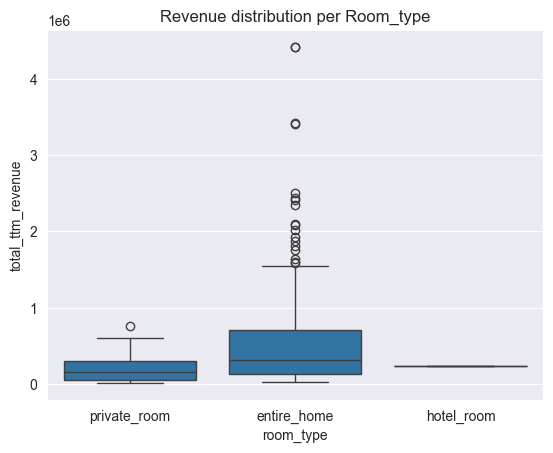

In [101]:
# how revenue varies per room_type per bedroom
sns.boxplot(data=df_listings, x='room_type', y='total_ttm_revenue')
plt.title('Revenue distribution per Room_type')

          total_ttm_revenue
bedrooms                   
5.0            1.494103e+06
4.0            9.827200e+05
3.0            6.741320e+05
2.0            5.254810e+05
1.0            4.203129e+05
10.0           3.433380e+05
7.0            2.030122e+05
8.0            1.344290e+05
15.0           3.347700e+04


Text(0.5, 1.0, 'TTM Revenue Variation per Bedroom in Entire_home room type')

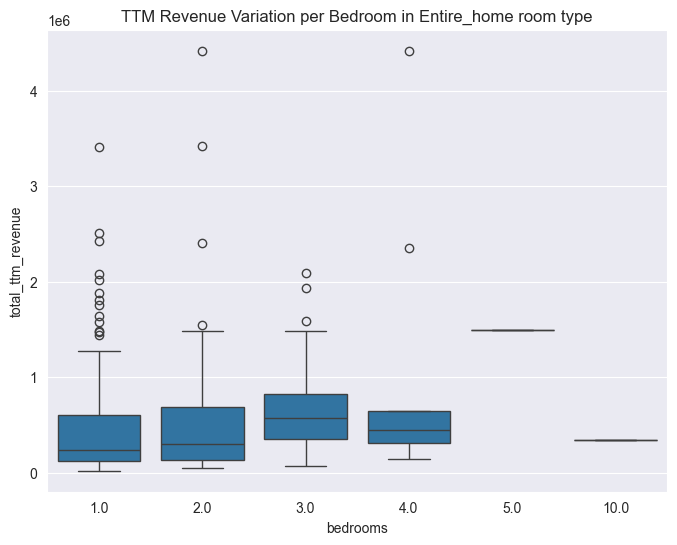

In [97]:
# filter data to only show where room_type == entire_home
filtered = df_listings[df_listings.room_type == 'entire_home']

# group the filtered data by bedroom and average revenue
avg = df_listings.groupby('bedrooms')['total_ttm_revenue'].mean().to_frame().sort_values(by='total_ttm_revenue',ascending=False)
print(avg)

# Plot the distribution of revenue per bedroom in the filtered data 
plt.figure(figsize=(8,6))
sns.boxplot(filtered, x='bedrooms', y='total_ttm_revenue')
plt.title('TTM Revenue Variation per Bedroom in Entire_home room type')

> pricing strategy features(daily rates, cleaning fees, extra guest fees) have negligble correlation with revenue; this implies that they don't affect revenue generation much

> Median revenue is highest for entire_home room type

> For entire_home room type, the 5 bedrooms listings has the highest median and average revenue but its data is not distributed across a wide range

> The 3 bedroom entire home room type has the 2nd highest median revenue

**Investigating Occupancy rates**

<Axes: >

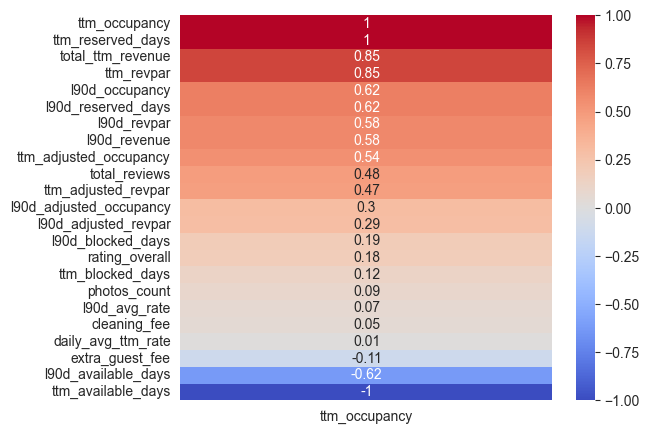

In [85]:
# Correlation heatmap for occupancy_rates 
correlation.ttm_occupancy.sort_values(ascending=False)
plt.figure(figsize=(6,5))
sns.heatmap(correlation.ttm_occupancy.sort_values(ascending=False).to_frame(), annot=True,cmap='coolwarm')

<Axes: xlabel='room_type', ylabel='ttm_occupancy'>

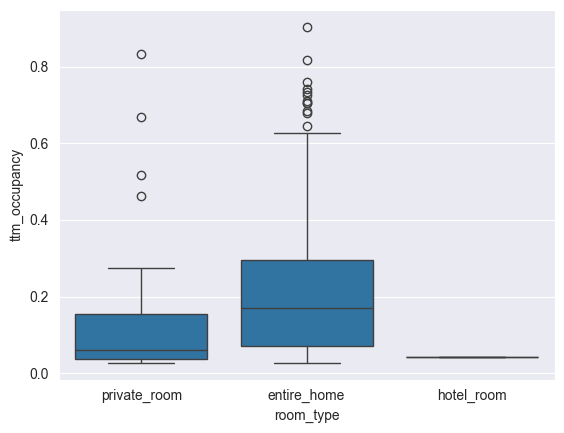

In [96]:
# distribution of revenue and revpar per room_type
sns.boxplot(data=df_listings, x='room_type', y='ttm_occupancy')

          ttm_occupancy
bedrooms               
5.0            0.452000
1.0            0.217574
3.0            0.214091
10.0           0.211000
2.0            0.180493
4.0            0.171000
7.0            0.064833
8.0            0.041000
15.0           0.030000


Text(0.5, 1.0, 'Occupancy rate Variation per Bedroom in Entire_home room type')

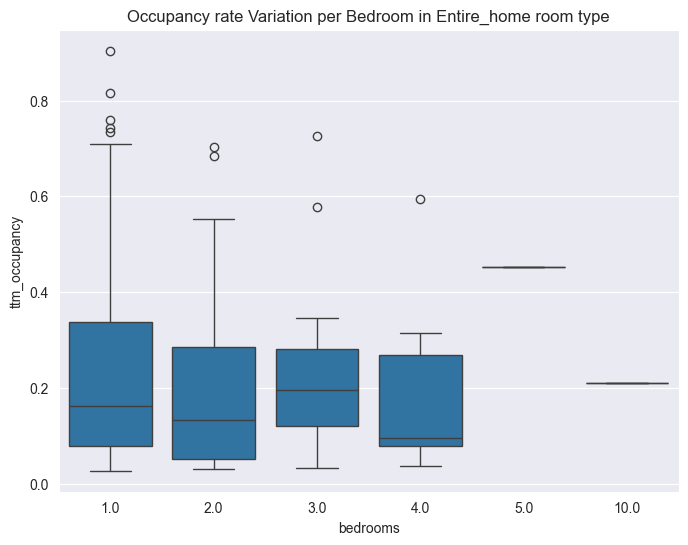

In [100]:
# how occupancy varies per bedroom in the entire_home room type
    # group the filtered data by bedroom and average revenue
avg = df_listings.groupby('bedrooms')['ttm_occupancy'].mean().to_frame().sort_values(by='ttm_occupancy',ascending=False)
print(avg)

# Plot the distribution of revenue per bedroom in the filtered data 
plt.figure(figsize=(8,6))
sns.boxplot(filtered, x='bedrooms', y='ttm_occupancy')
plt.title('Occupancy rate Variation per Bedroom in Entire_home room type')

> Pricing strategies too have a negligble correlatio with occupancy rates

> The number of reviews has slighlty high correlation with the number of reviews (0.48); implying that listings occupancy is influeced by the number customers who review it

> Entire_home rooms type have higher median occupancy rate compared to the other room types 

> For the entire home room type, averege and median occupancy rate is highest in the 5 bedroom category; this probably due to the few number of listings within that category

In [ ]:
cat_cols = ['bedrooms', 'beds', 'baths', 'guests']
# define function to calculate the average of 
def aggregate_categories(df_listings, cat_cols, agg_col):
    # define figure canvas
    fig, axs = plt.subplots(2, 2, figsize= (24, 18))
    plt.subplots_adjust(hspace=0.3, wspace=0.25, top=0.92)
    axs = axs.flatten()

    # loop through the categorical cols and calculate the average revenue for each category
    for i, col in enumerate(cat_cols):
        plot_data = df_listings.groupby(col)[agg_col].mean().sort_values(ascending=False).round(2).reset_index()

        sns.barplot(data = plot_data,
                    x = col,
                    y = agg_col,
                    ax= axs[i],
                    order=plot_data[col]
                    )
        axs[i].set_title(f'Mean. {agg_col.replace("_", " ").title()} by {col.title()}', fontsize=14)
        axs[i].set_xlabel(col, fontsize=12)
        axs[i].set_ylabel(f'Mean {agg_col}', fontsize=12)

        # Rotate x-labels for better readability
        if len(plot_data) > 5:
            axs[i].tick_params(axis='x', labelrotation=45)

    plt.suptitle(f'Mean {agg_col.title()} per Category', fontsize=20)
    plt.show()

agg_col = 'total_ttm_revenue'
aggregate_categories(df_listings, cat_cols, agg_col)

***

# Analysing the Calendar rates 

In [105]:
# create a copy of the dataframe
df_calendar_copy = df_calendar.copy()

# remove duplicates in df_calendar
df_calendar.drop_duplicates()
print('duplicates removed')

# convert date column to datetime format
df_calendar['date'] = pd.to_datetime(df_calendar['date'], errors='coerce')
print(df_calendar.date.dtypes)

# extract day of the week and month from the date column
df_calendar['month'] = df_calendar['date'].dt.month

# join the room_type from the df_listings  
df_calendar = df_calendar.merge(right=df_listings[['room_type', 'bedrooms']], left_on='listing_id',right_on=df_listings.listing_id)

df_calendar.head()

duplicates removed
datetime64[ns]


,listing_id,date,vacant_days,reserved_days,occupancy,revenue,rate_avg,booked_rate_avg,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,native_booked_rate_avg,native_rate_avg,native_revenue,month,room_type,bedrooms
0,36253079,2024-10-01,31,0,0.000,0.0,32.1,NaN,NaN,NaN,NaN,NaN,4141.0,0.0,10,entire_home,1.0
1,36253079,2024-11-01,30,0,0.000,0.0,30.8,NaN,NaN,NaN,NaN,NaN,3973.0,0.0,11,entire_home,1.0
2,36253079,2024-12-01,18,13,0.419,408.0,31.3,31.4,1.0,28.0,NaN,4066.0,4054.0,52839.0,12,entire_home,1.0
3,36253079,2025-01-01,16,15,0.484,472.0,31.5,31.5,NaN,NaN,1.0,4069.0,4069.0,60968.0,1,entire_home,1.0
4,36253079,2025-02-01,28,0,0.000,0.0,30.2,NaN,NaN,NaN,1.0,NaN,3901.0,0.0,2,entire_home,1.0


In [106]:
# remove columns in USD and rename some other columns for easier referencing
df_calendar.drop(columns=['revenue', 'rate_avg', 'booked_rate_avg'], inplace=True)

df_calendar.rename(columns={'native_revenue':'revenue', 'native_rate_avg':'rate_avg', 
                            'native_booked_rate_avg':'booked_rate_avg', 'occupancy':'occupancy_rate'}
                   , inplace=True)

print(df_calendar.shape)

(3540, 14)


In [107]:
# missing values in percentage
(df_calendar.isna().sum()/len(df_calendar)*100).round(2)

listing_id                0.00
date                      0.00
vacant_days               0.00
reserved_days             0.00
occupancy_rate            0.00
booking_lead_time_avg    53.33
length_of_stay_avg       53.33
min_nights_avg           24.24
booked_rate_avg          47.51
rate_avg                  0.00
revenue                   0.00
month                     0.00
room_type                 0.00
bedrooms                  0.00
dtype: float64

In [108]:
# investigate the reason for missing values in booked_rate_avg column
df_calendar_missing = df_calendar[df_calendar['booked_rate_avg'].isnull()]
df_calendar_missing[['reserved_days','booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'booked_rate_avg']]

,reserved_days,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,booked_rate_avg
0,0,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN
4,0,NaN,NaN,1.0,NaN
5,0,NaN,NaN,1.0,NaN
6,0,NaN,NaN,1.0,NaN
...,...,...,...,...,...
3533,0,NaN,NaN,1.0,NaN
3534,0,NaN,NaN,1.0,NaN
3535,0,NaN,NaN,1.0,NaN
3536,0,NaN,NaN,1.0,NaN


> Since this data represents actual, removing null values will result in loss of important data.

Null values in ['booked_rate_avg', 'length_of_stay_avg'] columns are as a result of a listing having zero reserved days hence making their calculation impossible

In [ ]:
# fill 'booked_rate_avg', 'length_of_stay_avg' with zero
df_calendar[['booked_rate_avg', 'length_of_stay_avg']].fillna(0, inplace=True)

# fill min_nights_avg with the average value 
df_calendar['min_nights_avg'].fillna(df_calendar['min_nights_avg'].mean(),inplace=True)

# drop the 'booked_rate_avg' column ~ we'll use the avg_rate to calculate the rates 
df_calendar.drop(columns='booked_rate_avg', inplace=True)

In [120]:
df_calendar.isna().sum()#/len(df_calendar)*100).round(2)

listing_id                  0
date                        0
vacant_days                 0
reserved_days               0
occupancy_rate              0
booking_lead_time_avg    1888
length_of_stay_avg       1888
min_nights_avg              0
rate_avg                    0
revenue                     0
month                       0
room_type                   0
bedrooms                    0
dtype: int64

**Summary statistics**

In [121]:
summary_calendar = df_calendar.describe(exclude='object').round(2).T
summary_calendar

,count,mean,min,25%,50%,75%,max,std
listing_id,3540.0,27854987.81,75683.0,19788515.0,30895380.0,38535757.25,42066452.0,11871432.9
date,3540,2025-03-16 04:30:30.508474368,2024-10-01 00:00:00,2024-12-01 00:00:00,2025-03-01 00:00:00,2025-06-01 00:00:00,2025-09-01 00:00:00,NaN
vacant_days,3540.0,24.16,0.0,20.0,28.0,31.0,31.0,8.75
reserved_days,3540.0,6.25,0.0,0.0,1.0,10.0,31.0,8.73
occupancy_rate,3540.0,0.21,0.0,0.0,0.03,0.33,1.0,0.29
booking_lead_time_avg,1652.0,27.71,1.0,1.0,11.0,33.0,352.0,44.4
length_of_stay_avg,1652.0,8.07,1.0,2.0,5.0,10.0,123.0,10.17
min_nights_avg,3540.0,2.37,1.0,1.0,2.0,2.37,31.0,3.66
rate_avg,3540.0,6893.74,1137.0,4017.75,5829.5,8321.5,45755.0,4797.52
revenue,3540.0,42129.71,0.0,0.0,6192.0,57681.75,660224.0,71384.15


> Listings a reserved on average 6 days in a month translating to an occupancy rate of about 21% 

**Correlation Analysis**

In [132]:
# calculate the correlation between the features 
num_cols = [col for col in df_calendar.select_dtypes(exclude='object') if col not in ['listing_id', 'date']]
corr = df_calendar[num_cols].corr(method='spearman').round(3)
corr

,vacant_days,reserved_days,occupancy_rate,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,rate_avg,revenue,month
vacant_days,1.000,-0.941,-0.942,-0.300,-0.567,-0.035,0.003,-0.911,0.009
reserved_days,-0.941,1.000,1.000,0.305,0.573,0.045,0.002,0.970,0.025
occupancy_rate,-0.942,1.000,1.000,0.305,0.573,0.044,0.002,0.970,0.022
booking_lead_time_avg,-0.300,0.305,0.305,1.000,0.026,-0.005,0.218,0.375,-0.019
length_of_stay_avg,-0.567,0.573,0.573,0.026,1.000,0.204,-0.193,0.370,0.062
min_nights_avg,-0.035,0.045,0.044,-0.005,0.204,1.000,0.027,0.021,0.301
rate_avg,0.003,0.002,0.002,0.218,-0.193,0.027,1.000,0.161,0.015
revenue,-0.911,0.970,0.970,0.375,0.370,0.021,0.161,1.000,0.025
month,0.009,0.025,0.022,-0.019,0.062,0.301,0.015,0.025,1.000


Text(0.5, 1.0, 'Correlation Heat Map for Calendar Rates Data')

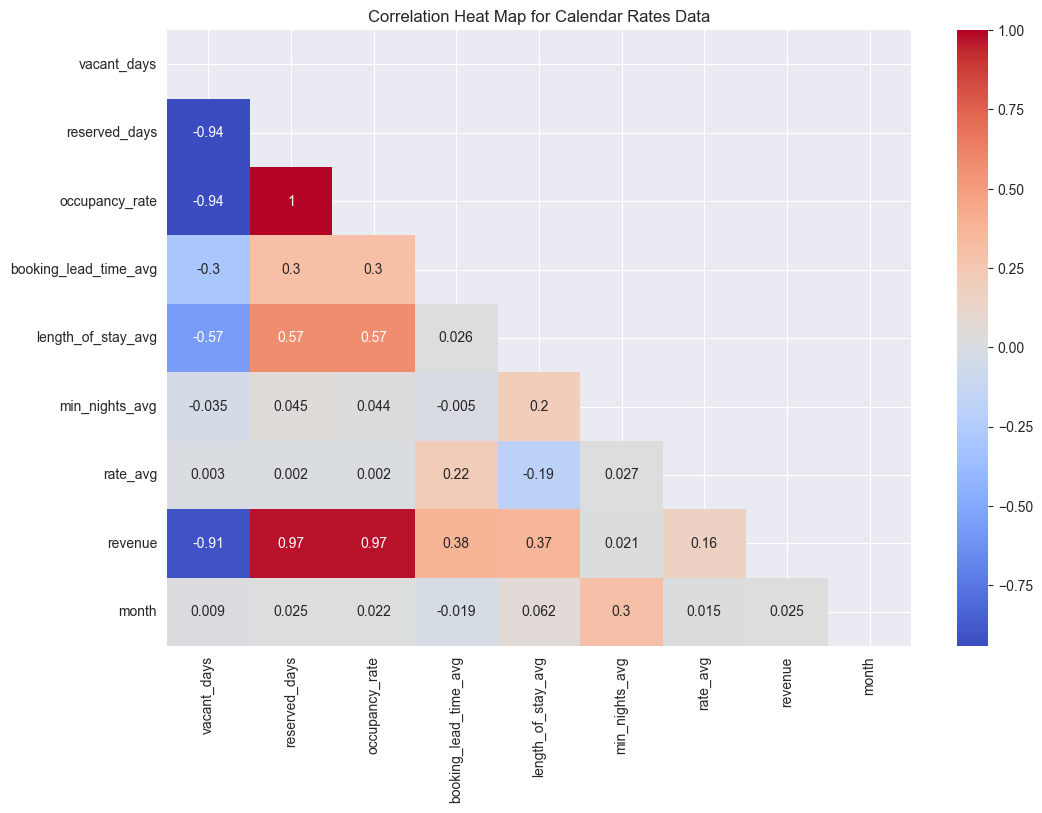

In [136]:
# plot correlation heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Heat Map for Calendar Rates Data')

**Guide questions**
- how does occupancy rate vary depending on month, date
- which month recorded the highest reservations 
- how booking lead_time(determines the demand- low lead_time indicates low demand) varies with time
- how length of stay varies depending on time
- how rates vary depending on the time 

**How do occupancy rates vary across months, and what seasonal patterns emerge in Nairobi’s Airbnb market?**

        mean  median    std
month                      
12     0.348   0.290  0.309
1      0.279   0.161  0.323
2      0.240   0.071  0.321
11     0.210   0.000  0.302
6      0.204   0.067  0.277
10     0.195   0.032  0.288
3      0.184   0.000  0.278
7      0.181   0.032  0.253
8      0.166   0.000  0.264
4      0.165   0.000  0.265
5      0.164   0.000  0.263
9      0.126   0.000  0.219


Text(0.5, 1.0, 'Average Occupancy Rate Across the Months')

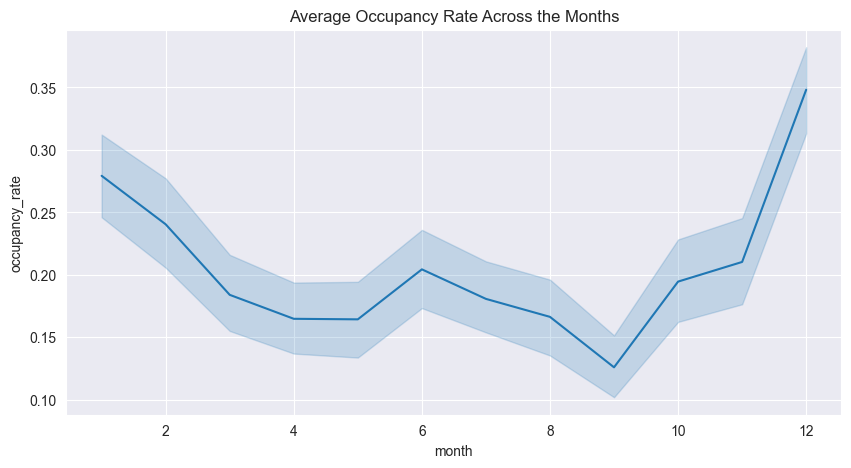

In [122]:
# calculate various aggregate statistics about occupancy rates across the months
agg_occupancy = df_calendar.groupby('month')['occupancy_rate'].agg(func=['mean','median','std']).sort_values(by='mean', ascending=False).round(3)
print(agg_occupancy)

# plot the average occupancy rate per month 
plt.figure(figsize=(10,5))
sns.lineplot(data=df_calendar, x='month', y= 'occupancy_rate')
plt.title("Average Occupancy Rate Across the Months")

>  Average Occupancy rates peak during the December, with the lowest occupancy rates recorded during September

> The period between November through to February has the highest average occupancany rates; this may be due to the Christmas and new year holiday season

> Average occupancy rates have a downward trend from March to the lowest average rate in September with a slight rise during June 

**Booking lead time variation** across the year

       median    mean     std
month                        
8        22.0  34.092  38.989
1        15.0  28.031  38.440
7        15.0  27.307  34.941
3        12.0  27.967  46.674
11       12.0  29.961  52.395
4        11.0  24.829  44.274
10       11.0  27.534  47.510
9        11.0  29.730  44.315
2        10.0  31.651  53.324
5         8.0  28.026  51.832
12        7.5  24.927  37.581
6         6.0  21.200  43.843


Text(0.5, 1.0, 'Average Booking Lead Time Across the Months')

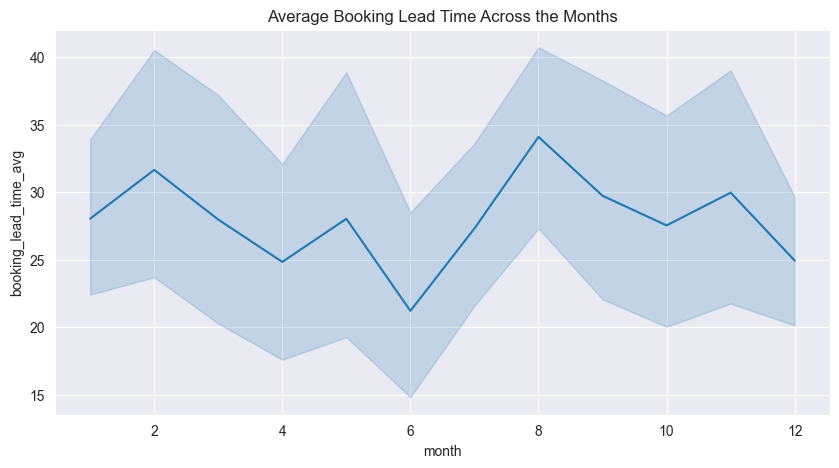

In [131]:
# calculate various aggregate statistics about occupancy rates across the months
agg_occupancy = df_calendar.groupby('month')['booking_lead_time_avg'].agg(func=['median','mean','std']).sort_values(by='median', ascending=False).round(3)
print(agg_occupancy)

# plot the average occupancy rate per month 
plt.figure(figsize=(10,5))
sns.lineplot(data=df_calendar, x='month', y= 'booking_lead_time_avg')
plt.title("Average Booking Lead Time Across the Months")

> Lead time is important in informing pricing strategy and financial planning. Low lead time indicates last minute reservations hence high demand. 
- Average booking lead time is least lowest during the months of June and December respectively, this months also have a high occupancy rates, this shows that the demand peaks during this periods of the year 

**What is the impact of minimum night requirements (min_nights_avg) on occupancy and revenue?**

In [141]:
print(df_calendar.groupby('min_nights_avg')['occupancy_rate'].agg('mean'))

min_nights_avg
1.000000     0.176846
2.000000     0.221289
2.366145     0.206466
3.000000     0.312739
4.000000     0.050614
5.000000     0.174200
7.000000     0.217848
14.000000    0.049500
16.000000    0.677500
19.000000    0.740000
22.000000    0.742000
24.000000    0.816500
26.000000    0.387000
28.000000    0.431583
30.000000    0.285533
31.000000    0.154444
Name: occupancy_rate, dtype: float64


**How rates vary across the different months and what factors have an influence on them**

       median      mean       std
month                            
5      6115.0  7062.697  4856.501
8      6098.0  7128.230  4803.940
9      6085.0  7121.192  4812.679
6      6060.0  7125.450  4916.531
7      6034.0  7060.515  4840.112
4      5782.5  6811.440  4887.748
3      5686.5  6694.054  4755.255
12     5665.5  6844.315  4800.954
2      5645.0  6637.916  4721.548
11     5586.0  6757.060  4756.642
1      5573.5  6740.638  4742.968
10     5573.0  6766.138  4725.189


Text(0.5, 1.0, 'Average Booking rates Across the Months')

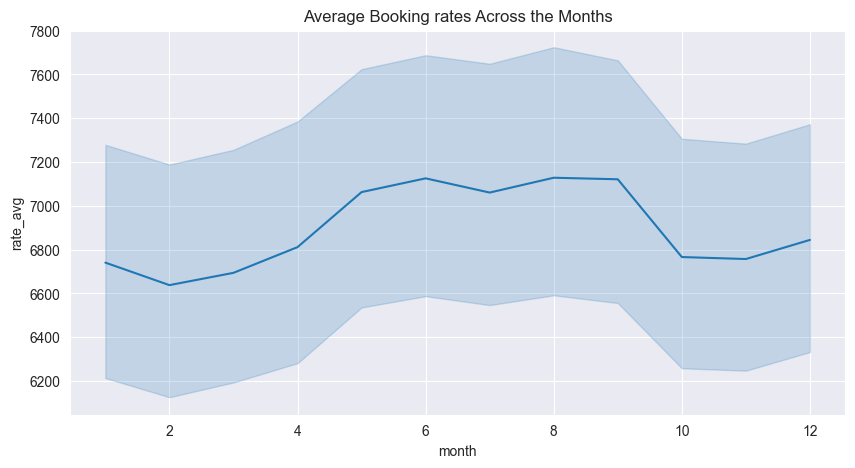

In [144]:
# summary statistics for average rates per month
avg_rates = df_calendar.groupby('month')['rate_avg'].agg(func=['median','mean','std']).sort_values(by='median', ascending=False).round(3)
print(avg_rates)

# lineplot for average rates 
plt.figure(figsize=(10,5))
sns.lineplot(data=df_calendar, x='month', y= 'rate_avg')
plt.title("Average Booking rates Across the Months")

> High demand months(November to December) have the lowest rates compared to the rates in May and September which have high rates but low occupancy rates.
- The low rates may be as a result of high demand and competition which forces hosts to reduce their rates 

***

# Summary of Analysis